# 1. Install and Import Dependencies

In [1]:
# %pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# !git clone https://github.com/ultralytics/yolov5

In [4]:
# !cd yolov5 & pip install -r requirements.txt

In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/nkumar/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-18 Python-3.10.13 torch-2.2.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [8]:
# img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

import requests
from PIL import Image
from io import BytesIO
import torchvision.transforms as transforms
import torch

# URL of the image
# img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

img_url = 'CarsInTraffic.jpeg'

results = model(img_url)
results.print()

# Set headers with a User-Agent
# headers = {
#     'User-Agent': 'My User Agent 1.0',
# }

# # Fetch the image from the URL with headers
# response = requests.get(img_url, headers=headers)

# # Ensure the request was successful
# if response.status_code == 200:
#     # Use BytesIO for the image content
#     img = Image.open(BytesIO(response.content)).convert('RGB')
    
#     # Define the transformation
#     transform = transforms.Compose([
#         transforms.Resize((640, 640)),
#         transforms.ToTensor(),
#     ])
    
#     # Apply the transformation to the image
#     img_tensor = transform(img).unsqueeze(0)  # Add a batch dimension
    
#     # Assuming your model is already loaded as 'model'
#     # Perform inference
#     with torch.no_grad():
#         results = model(img_tensor)
    
#     # Print or process results
#     print(results)
# else:
#     print(f"Failed to fetch image. Status code: {response.status_code}")



image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 17.7ms pre-process, 93.6ms inference, 8.2ms NMS per image at shape (1, 3, 448, 640)


In [9]:
# results = model(img)
# results.print()

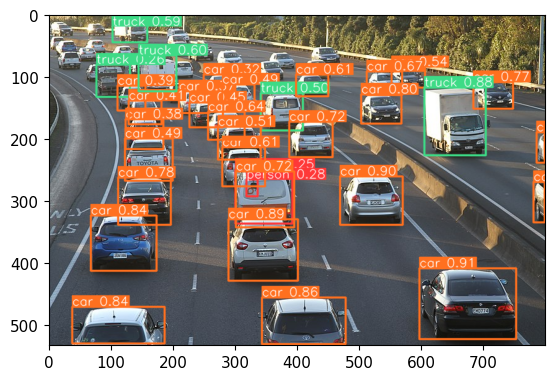

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [11]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [12]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     # Make detections 
#     results = model(frame)
    
#     cv2.imshow('YOLO', np.squeeze(results.render()))
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

# 5. Train from scratch

In [13]:
import uuid   # Unique identifier
import os
import time

In [14]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake','drowsy']
number_imgs = 20

In [15]:
# cap = cv2.VideoCapture(0)
# # Loop through labels
# for label in labels:
#     print('Collecting images for {}'.format(label))
#     time.sleep(5)
    
#     # Loop through image range
#     for img_num in range(number_imgs):
#         print('Collecting images for {}, image number {}'.format(label, img_num))
        
#         # Webcam feed
#         ret, frame = cap.read()
        
#         # Naming out image path
#         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
#         # Writes out image to file 
#         cv2.imwrite(imgname, frame)
        
#         # Render to the screen
#         cv2.imshow('Image Collection', frame)
        
#         # 2 second delay between captures
#         time.sleep(2)
        
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
# cap.release()
# cv2.destroyAllWindows()

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.9fcdd244-ce30-11ee-9702-1a05173e237f.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.9fd0b018-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b0fe-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b14e-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b18a-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b1d0-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b20c-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b248-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b284-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b2ca-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b306-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b342-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b37e-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b3ba-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b3f6-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b432-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b46e-ce30-11ee-9702-1a05173e237f.jpg
data/images/awake.9fd0b4b4-ce30-11ee-9702-1a05173e237f.j

In [18]:
#!git clone https://github.com/tzutalin/labelImg

In [19]:
#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [20]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# 6. Load Custom Model

In [21]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp8/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/nkumar/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-2-18 Python-3.10.13 torch-2.2.0 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [22]:
img = os.path.join('data', 'images', 'awake.0a242d3a-cdcf-11ee-888c-1a05173e237f.jpg')

In [23]:
results = model(img)

In [24]:
results.print()

image 1/1: 1080x1920 1 awake
Speed: 20.1ms pre-process, 56.9ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


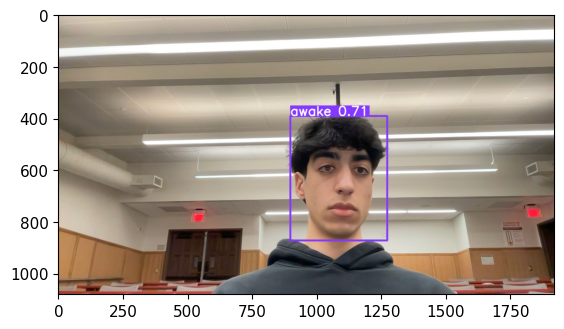

In [25]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [26]:
import cv2 as cv
import numpy as np
import mediapipe as mp
import math

mp_face_mesh = mp.solutions.face_mesh
LEFT_EYE = [362,382,381,380,374,373,390,249,263,466,388,387,386,385,384,398] # facial landmarks for the left eye
RIGHT_EYE = [33,7,163,144,145,153,154,155,133,173,157,158,159,160,161,246]

RIGHT_IRIS = [474,475,476,477] # facial landmarks for left iris
LEFT_IRIS = [469,470,471,472] # facial landmarks for right iris

L_H_LEFT = [33] # Right Eye -> right most landmark
L_H_RIGHT = [133] # Right Eye -> left most landmark

R_H_LEFT = [362] # Left Eye -> right most landmark
R_H_RIGHT = [263] # Left Eye -> left most landmark
MOUTH_OUTLINE = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146, 61]

# calculate distance between two eye landmarks
def euclidean_distance(point1,point2):
    x1,y1, = point1.ravel()
    x2,y2, = point2.ravel()
    distance = math.sqrt((x2-x1)**2 + (y2-y1)**2)
    return distance

def mouth_aspect_ratio(mouth_landmarks):
    # Calculate the distances between the mouth landmarks
    p2_p8 = euclidean_distance(mouth_landmarks[1], mouth_landmarks[7])
    p3_p7 = euclidean_distance(mouth_landmarks[2], mouth_landmarks[6])
    p4_p6 = euclidean_distance(mouth_landmarks[3], mouth_landmarks[5])
    p1_p5 = euclidean_distance(mouth_landmarks[0], mouth_landmarks[4])


    # Calculate the mouth aspect ratio including the inner mouth
    mouth_aspect_ratio = (p2_p8 + p3_p7 + p4_p6) / (1.5 * p1_p5)
    return mouth_aspect_ratio


# classify eye position based on iris ratio
def iris_position(iris_center, right_point, left_point):
    # calculate the eye position ratio (ratio of where the pupil is based on the whole eye)
    center_to_right_dist = euclidean_distance(iris_center, right_point)
    total_eye_dist = euclidean_distance(right_point,left_point)
    eye_pos_ratio = center_to_right_dist / total_eye_dist

    iris_position = ""

    # classify eye location
    if eye_pos_ratio <= 0.34:
        iris_position="right"
    elif eye_pos_ratio > 0.34 and eye_pos_ratio <= 0.66:
        iris_position="center"
    else:
        iris_position="left"

    return iris_position, eye_pos_ratio


In [27]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

cred = credentials.Certificate("/Users/nkumar/Desktop/ZoomGage/venv2/ZoomGage/zoomgage.json")
firebase_admin.initialize_app(cred)

db = firestore.client()

In [28]:
cap = cv2.VideoCapture('/Users/nkumar/Desktop/ZoomGage/venv2/ZoomGage/modelTest300Trim.mp4')
index = 0
yawning = 0
drowsy = 0
with mp_face_mesh.FaceMesh(
    max_num_faces=4,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
) as face_mesh:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Make detections 
        results = model(frame)

        # Extract data from results
        # The structure of 'results' depends on the specific model and framework being used
        # Below is a general way to access detected class labels, confidence scores, and bounding boxes
        detections = results.xyxy[0]  # For YOLOv5, results.xyxy[0] contains detection results
        
        # Loop through detections
        for *xyxy, conf, cls in detections:
            label = results.names[int(cls)]  # Get the class label
            
            print(f"Detected {label} with confidence {conf:.2f}, index: {index}")

            if(label == "awake"):
                drowsy = 0
            elif(label == "drowsy"):
                drowsy = 1
            
            
            # Use label and confidence as needed
            # For example, log, display on the frame, or use in an application logic

        cv2.imshow('YOLO', np.squeeze(results.render()))

        frame = cv.flip(frame,1)
        rgb_frame = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
        img_height,img_width = frame.shape[:2]
        results = face_mesh.process(rgb_frame)
        iris_pos, eye_position_ratio, mar = '', 0.0, 0.0
        if results.multi_face_landmarks:
            #print(results.multi_face_landmarks[0].landmark)
            mesh_points=np.array([np.multiply([p.x,p.y], [img_width, img_height]).astype(int) for p in results.multi_face_landmarks[0].landmark])
            #print(mesh_points.shape)
            cv.polylines(frame,[mesh_points[MOUTH_OUTLINE]], True, (255,255,0), 1, cv.LINE_AA) # creates line around left eye
            #cv.polylines(frame,[mesh_points[MOUTH]], True, (0,255,0), 1, cv.LINE_AA) # creates line around right eye
            
            
            # find circle area for the pupils (iris)
            (l_cx,l_cy), l_radius = cv.minEnclosingCircle(mesh_points[LEFT_IRIS])
            (r_cx,r_cy), r_radius = cv.minEnclosingCircle(mesh_points[RIGHT_IRIS])
            center_left = np.array([l_cx,l_cy],dtype=np.int32)
            center_right = np.array([r_cx,r_cy],dtype=np.int32)

            #draw circle (segment) the pupils in the webcam feed
            cv.circle(frame,center_left,int(l_radius),(255,0,255),1,cv.LINE_AA)
            cv.circle(frame,center_right,int(r_radius),(255,0,255),1,cv.LINE_AA)


            

            cv.circle(frame,mesh_points[R_H_RIGHT][0], 3, (255,255,255),-1,cv.LINE_AA)
            cv.circle(frame,mesh_points[R_H_LEFT][0], 3, (0,255,255),-1,cv.LINE_AA)

            cv.circle(frame,mesh_points[L_H_RIGHT][0], 3, (255,255,255),-1,cv.LINE_AA)
            cv.circle(frame,mesh_points[L_H_LEFT][0], 3, (0,255,255),-1,cv.LINE_AA)


            

            iris_pos, eye_position_ratio = iris_position(
                center_right,mesh_points[R_H_RIGHT],mesh_points[R_H_LEFT][0]
                )
            
            mar = mouth_aspect_ratio(mesh_points[MOUTH_OUTLINE])

            
            


            # Write out iris position and ratio
        frame = cv.flip(frame,1)
        # Draw the text with a thicker line
        cv.putText(frame, f"Iris pos: {iris_pos}", (40, 50), cv.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 3, cv.LINE_AA)

        # Draw the ratio on a new line at the bottom
        cv.putText(frame, f"Ratio: {eye_position_ratio:.2f}", (40, 120), cv.FONT_HERSHEY_PLAIN, 3.5, (255, 0, 0), 3, cv.LINE_AA)

        # Draw the ratio on a new line at the bottom
        cv.putText(frame, f"MAR Ratio: {mar:.2f}", (40, 170), cv.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 3, cv.LINE_AA)

        if mar < 2:
            # Draw the ratio on a new line at the bottom
            cv.putText(frame, f"WAKEUP!", (40, 210), cv.FONT_HERSHEY_PLAIN, 3, (255, 0, 0), 3, cv.LINE_AA)
            yawning = 1
        else:
            yawning=0

        # drowsy, yawning, eye_position_ratio
        engagement = (1-abs(0.5-eye_position_ratio)-0.55*drowsy-0.4*yawning)*100

        if engagement < 0:
            engagement = 0

        data = {
            'engagementscore': int(engagement)
        }

        doc_ref = db.collection('engage_score_collection').document('eng')
        doc_ref.set(data)

        # engagement = ((drowsy+yawning+(1-abs(0.5-eye_position_ratio)*2))/3)*100
        # print(f"engagement: {engagement}")
        cv.putText(frame, f"Engagement: {int(engagement)}%", (40, 250), cv.FONT_HERSHEY_PLAIN, 3, (0, 0, 255), 3, cv.LINE_AA)


            
        cv.imshow('img', frame)

        index+=1
        # cv2.imshow('img', frame)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

I0000 00:00:1708241874.819548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1 Max
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Detected awake with confidence 0.53, index: 2
Detected awake with confidence 0.51, index: 3
Detected awake with confidence 0.57, index: 4
Detected awake with confidence 0.54, index: 5
Detected awake with confidence 0.51, index: 6
Detected awake with confidence 0.50, index: 7
Detected awake with confidence 0.48, index: 8
Detected awake with confidence 0.48, index: 9
Detected awake with confidence 0.46, index: 10
Detected awake with confidence 0.50, index: 11
Detected awake with confidence 0.52, index: 12
Detected awake with confidence 0.52, index: 13
Detected awake with confidence 0.51, index: 14
Detected awake with confidence 0.50, index: 15
Detected awake with confidence 0.51, index: 16
Detected awake with confidence 0.32, index: 17
Detected awake with confidence 0.51, index: 18
Detected awake with confidence 0.49, index: 19
Detected awake with confidence 0.50, index: 20
Detected awake with confidence 0.48, index: 21
Detected awake with confidence 0.48, index: 22
Detected awake with c

AttributeError: 'NoneType' object has no attribute 'shape'

: 